<a href="https://colab.research.google.com/github/visarad/tensorflow/blob/master/project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files


In [3]:
!pip3 install kaggle

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"visaradkumar","key":"521e3fecd9ac02c7a984655f0ca536fc"}'}

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [9]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                         title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           1089          4  0.1764706        


In [10]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..


 96% 665M/691M [00:03<00:00, 109MB/s]
100% 691M/691M [00:04<00:00, 180MB/s]
/content


In [ ]:
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [19]:
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [41]:
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [22]:
labels_all = pd.read_csv("dog_dataset/labels.csv")

In [23]:
labels_all.shape
labels_all.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [24]:
all_breeds = labels_all['breed']

In [26]:
breed_counts =  all_breeds.value_counts()

In [27]:
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [28]:
CLASS_NAMES = ['scottish_deerhound'      ,
'maltese_dog'             ,
'afghan_hound'            ,
'entlebucher'             ,
'bernese_mountain_dog'    ]

In [29]:
labels = labels_all[labels_all['breed'].isin(CLASS_NAMES)]

In [30]:
labels = labels.reset_index()
labels

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher
...,...,...,...
583,10154,fe3e760d763e186541e18f303cd7caca,bernese_mountain_dog
584,10158,fe50bac6c389d137ea01c9cfc7346ca8,scottish_deerhound
585,10178,fef5d4cdaf50cf159102e803c7d6aa9c,bernese_mountain_dog
586,10200,ff7d9c08091acc3b18b869951feeb013,maltese_dog


In [31]:
X_data = np.zeros((len(labels),224,224,3),dtype="float32")
y_data = label_binarize(labels['breed'],classes=CLASS_NAMES)

In [32]:
X_data.shape,y_data.shape

((588, 224, 224, 3), (588, 5))

In [34]:
for i in tqdm(range(len(labels))):
  img = image.load_img('dog_dataset/train/%s.jpg' % labels['id'][i],target_size=(224,224))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy(),axis=0)
  X_data[i] = x/255.0


100%|██████████| 588/588 [00:03<00:00, 175.24it/s]


In [35]:
X_data.shape,y_data.shape

((588, 224, 224, 3), (588, 5))

In [53]:
from tensorflow.keras.layers import Dropout

In [156]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(4,4),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))
model.add(Conv2D(filters=64, kernel_size=(5,5),activation='relu',kernel_regularizer='l1'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(filters=32, kernel_size=(6,6),activation='relu',kernel_regularizer='l1'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu',kernel_regularizer='l1'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Flatten())
model.add(Dense(128,activation='elu',kernel_regularizer='l2'))
model.add(Dense(64,activation='elu',kernel_regularizer='l2'))
model.add(Dense(len(CLASS_NAMES),activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001),metrics=['accuracy'])
model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 221, 221, 128)     6272      
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 110, 110, 128)    0         
 g2D)                                                            
                                                                 
 batch_normalization_23 (Bat  (None, 110, 110, 128)    512       
 chNormalization)                                                
                                                                 
 dropout_57 (Dropout)        (None, 110, 110, 128)     0         
                                                                 
 conv2d_78 (Conv2D)          (None, 106, 106, 64)      204864    
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 53, 53, 64)     

In [122]:
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_data,y_data,test_size=0.2,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val,y_train_and_val,test_size=0.2,shuffle=True)

In [123]:
X_train.shape,X_test.shape,X_val.shape

((376, 224, 224, 3), (118, 224, 224, 3), (94, 224, 224, 3))

In [ ]:
epochs = 50
batch_size = 128
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs, validation_data=(X_val,y_val))

In [158]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 34ms/step - loss: 3.5611 - accuracy: 0.3898


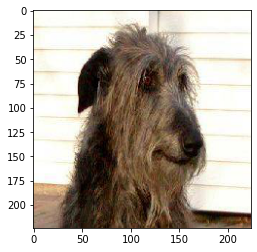

('scottish_deerhound', 'scottish_deerhound')

In [159]:
i = 111
plt.imshow(X_test[i,:,:,:])
plt.show()
labels['breed'][np.argmax(y_test[i])],labels['breed'][np.argmax(y_pred[i])]

In [160]:
sum = 0
no_test = 118
for i in range(no_test):
  if labels['breed'][np.argmax(y_test[i])]==labels['breed'][np.argmax(y_pred[i])]:
    sum+=1  
sum/no_test

0.5

In [1]:
import random

In [38]:
def rand_sum(x):
  while True:
      a = random.randint(1,x)
      b = random.randint(1,x)
      c = random.randint(1,x)

      if  a+b+c == x and (a>50 and a<60) and (b>50 and b<60) and (c>50 and c<60):
        return a,b,c


In [39]:
rand_sum(170)

(52, 59, 59)

In [29]:
def generate(n):
  x = random.randint(0,int(n/3))
  y = random.randint(int(n/3),int(2*n/3))
  z = n-x-y
  return x,y,z


In [35]:
generate(400)

(84, 258, 58)

In [17]:
from numpy.random.mtrand import seed
import numpy as np

sample = np.random.randint(0,10,size=(10,10))
sample

array([[2, 1, 9, 8, 5, 2, 0, 9, 1, 5],
       [2, 8, 9, 1, 3, 2, 8, 7, 0, 7],
       [7, 9, 5, 3, 5, 6, 5, 4, 3, 5],
       [6, 5, 6, 8, 8, 4, 1, 6, 9, 6],
       [1, 2, 7, 1, 8, 6, 2, 8, 8, 9],
       [6, 9, 7, 4, 4, 2, 1, 9, 0, 1],
       [0, 2, 8, 4, 8, 5, 0, 2, 2, 7],
       [8, 2, 7, 6, 1, 9, 9, 5, 1, 7],
       [4, 8, 2, 5, 7, 6, 8, 4, 2, 7],
       [0, 6, 9, 9, 3, 8, 2, 2, 5, 0]])

In [28]:
point1 = (1,1)
point2 = (4,4) 

In [29]:
sum(sum(sample[point1[0]:point2[0],point1[1]:point2[1]]))

54

In [30]:
sample[point1[0]:point2[0],point1[1]:point2[1]]

array([[8, 9, 1],
       [9, 5, 3],
       [5, 6, 8]])

In [119]:
sample = [[2, 1, 9, 8, 5, 2, 0, 9, 1, 5],
          [2, 8, 9, 1, 3, 2, 8, 7, 0, 7],
          [7, 9, 5, 3, 5, 6, 5, 4, 3, 5],
          [6, 5, 6, 8, 8, 4, 1, 6, 9, 6],
          [1, 2, 7, 1, 8, 6, 2, 8, 8, 9],
          [6, 9, 7, 4, 4, 2, 1, 9, 0, 1],
          [0, 2, 8, 4, 8, 5, 0, 2, 2, 7],
          [8, 2, 7, 6, 1, 9, 9, 5, 1, 7],
          [4, 8, 2, 5, 7, 6, 8, 4, 2, 7],
          [0, 6, 9, 9, 3, 8, 2, 2, 5, 0]]

In [177]:
r1,c1 = 3,5
r2,c2 = 6,5
total =0 
matx = [sample[i][:j] for i in range(r1,r2,1) for j in range(c1+1,0,-c1-1) ]
print(matx)

[[6, 5, 6, 8, 8, 4], [1, 2, 7, 1, 8, 6], [6, 9, 7, 4, 4, 2]]


[6, 5, 6, 8, 8, 4] 1
[7, 9, 5, 3, 5, 6] 5
[2, 8, 9, 1, 3, 2] 8


AttributeError: ignored